# Assignment 4: Implementation of ConvNets (start early on this one!)
-------------------------------------
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Hi class, this is my first time giving a homework like this on ConvNets, but I think you will really enjoy it since it's practical ConvNet implementation vs. a simple math problem. *If you have any code problems, please post on the Discussion Board so your classmates and I can help!*

Below is a great demo script that I found on how to use 'Bing image downloader' with Colab! Please clean up/update the script to download at least 200 images of any two classes you would like to predict (such as 'person wearing mask' and 'person not wearing a mask'). You may need to download a few different search queries if Bing limits you to 100 images - be creative about how you can get more data. The data will download locally onto this runtime (click the folder icon on the left), and you can move files and create new folders for train, test, validation partition. You can delete any unncessary code, of course.

We haven't shown how to do this in class, but here's a code that shows you how to copy N images over from train folder to the test folder:
* https://stackoverflow.com/questions/60090552/copying-file-from-one-directory-to-another-directory-in-google-colab

If you get stuck prepping your data on the local runtime, reach out on the Discussion Board!

When you submit your assignment, I should be able to run your ENTIRE script without mounting the Google Drive since everything is locally downloaded and prepared. This will take some extra coding but I think you can hack the stuff below to make it work.

After your data is prepared, review my existing scripts and use the image generators to read data and fit a model like we did for Cats and Dogs! You can go as far as you want with this assignment in terms of the modeling but **you must build at least one vanilla ConvNet model and you must evaluate the model** (remember: evaluating a generator can be tricky, see my code for help.) If you want to go above and beyond, try using transfer learning or fine tuning or data augmentation. You will probably get a better fitting model!

Of course, your script should be beautifully laid out with lots of subheaders and comments. When you are done with this assignment, it should be of such quality that you would be proud to share this notebook with a potential employer to demonstrate your computer vision skills.

**Rubric:**
* (10 points) Provide a nice five to ten sentence of the problem you are trying to solve with image classification (please only do binary classification for this assignment.)
* (40 points) Image downloader code below has been adapted to work on local runtime. New directories are created for train, test and validation partition of each class.
* (20 points) Fit a ConvNet model
* (20 points) Evaluate the ConvNet model
* (10 points) At least five meaningful, thoughtful bullets of what you learned in this assignment.

Severe points will be deducted if the notebook does not have lots of headers, text cells, comments etc. Zero points if the code is not 'run all' in its entirety before submitting (so that I can review the code output!)

Ask friends for help but do your own work. I hope you enjoy this assignment.


# 🟡 Problem Statement

The problem I am trying to solve is to accurately differentiate between merchandise belonging to  Adidas or Nike. Simply, I am trying to separate if an item has an Adidas logo or Nike logo on it. This would be very useful for online retailers such as Finish line, Dick’s Sporting Goods, and more. The primary objective would be to ensure brand authenticity and improve customers’ online shopping experiences with products being in the right category, as image recognition enables effective brand-based categorization. Next, for retailers, manually updating stock items is a long and tedious process. Instead with computer vision or an image classification system, online retailers can update their stock or add new stock in the snap of a finger. Overall, implementing image classification will help increase time to market for online retailers and enahnced customer experience.

# 🔵 Bing Image Downloader Installer and Image Download

## Importing Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

In [ ]:
!pip install bing-image-downloader

## Adidas and Nike Images Download

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("Adidas Merchandise", limit=300,  output_dir='images', adult_filter_off=True, force_replace=False) # Downloading 300 images for Adidas

[%] Downloading Images to /content/images/Adidas Merchandise


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/fe/61/a0/fe61a01bdde81264248afb01d10fda6f.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.80scasualclassics.co.uk/images/adidas-originals-long-sleeve-pique-t-shirt-green-night-p8938-58670_image.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://mypilot.co.uk/images/adidas-originals-clothing-outline-trefoil-black-sweatshirt-p43150-105069_image.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.lipstiq.com/wp-content/uploads/2016/07/adidas-SCKLM16-Merchandise_Graphic-Tees.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://ih1.redbubble.net/image.545286247.0948/stf,small,600x600-c,0,0,1000,1000.u5.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://diskingdom.com/wp-content/uploads/2018/06/ad_kv_img_pc-880x440.png
[%] File Downloade

In [ ]:
downloader.download("Nike Merchandise", limit=300,  output_dir='images', adult_filter_off=True, force_replace=False) # Downloading 300 images for Nike

Streaming output truncated to the last 5000 lines.
[%] File Downloaded !

[%] Downloading Image #42 from https://i0.wp.com/i.imgur.com/AS2YS2j.jpg
[%] File Downloaded !



[!!]Indexing page: 24

[%] Indexed 35 Images on Page 24.




[!!]Indexing page: 25

[%] Indexed 35 Images on Page 25.


[%] Downloading Image #43 from https://brobible.com/wp-content/uploads/2019/02/istock-814357654.jpg
[%] File Downloaded !



[!!]Indexing page: 26

[%] Indexed 35 Images on Page 26.


[%] Downloading Image #44 from https://www.abnewswire.com/uploads/1583270148.jpeg
[%] File Downloaded !



[!!]Indexing page: 27

[%] Indexed 35 Images on Page 27.


[%] Downloading Image #45 from https://s3.amazonaws.com/yomzansi.com/wp-content/uploads/2017/11/17233841/nike-nba-merchandise-shesha-stores.png
[%] File Downloaded !



[!!]Indexing page: 28

[%] Indexed 35 Images on Page 28.


[%] Downloading Image #46 from https://image.slidesharecdn.com/nike-150915080022-lva1-app6891/95/nike-retail-store-39-638.jpg?cb=1

## Checking local directory

In [ ]:
!ls images/data_dir -alrt # Local Directory looks good, both sets of data are here

total 32
drwxr-xr-x 2 root root 12288 Oct 13 21:50 'Adidas Merchandise'
drwxr-xr-x 2 root root 12288 Oct 13 22:01 'Nike Merchandise'
drwxr-xr-x 4 root root  4096 Oct 13 22:27  ..
drwxr-xr-x 4 root root  4096 Oct 13 22:27  .


In [ ]:
!ls 'images'/'data_dir'/'Nike Merchandise' # All 300 images are here

Image_100.jpeg	Image_146.jpg	Image_191.jpg  Image_236.jpg   Image_281.png   Image_55.jpeg
Image_101.jpeg	Image_147.jpg	Image_192.jpg  Image_237.jpg   Image_282.jpeg  Image_56.jpeg
Image_102.jpg	Image_148.gif	Image_193.jpg  Image_238.jpg   Image_283.png   Image_57.jpeg
Image_103.jpeg	Image_149.jpg	Image_194.jpg  Image_239.png   Image_284.png   Image_58.jpeg
Image_104.jpg	Image_14.jpg	Image_195.jpg  Image_23.png    Image_285.jpg   Image_59.jpeg
Image_105.jpeg	Image_150.jpeg	Image_196.jpg  Image_240.png   Image_286.png   Image_5.jpg
Image_106.jpg	Image_151.jpg	Image_197.jpg  Image_241.png   Image_287.png   Image_60.jpg
Image_107.jpeg	Image_152.jpg	Image_198.jpg  Image_242.png   Image_288.png   Image_61.jpeg
Image_108.jpg	Image_153.jpg	Image_199.png  Image_243.png   Image_289.png   Image_62.jpeg
Image_109.jpeg	Image_154.jpg	Image_19.png   Image_244.png   Image_28.png    Image_63.jpg
Image_10.jpg	Image_155.jpg	Image_1.jpg    Image_245.png   Image_290.jpg   Image_64.jpeg
Image_110.png	Image_

In [ ]:
!ls 'images'/'data_dir'/'Adidas Merchandise' # All 300 images are here

Image_100.jpg	Image_146.jpg	Image_191.jpeg	Image_236.jpg	Image_281.jpg	Image_55.jpg
Image_101.jpeg	Image_147.jpg	Image_192.jpeg	Image_237.jpg	Image_282.jpg	Image_56.jpg
Image_102.jpg	Image_148.jpg	Image_193.jpg	Image_238.jpg	Image_283.jpg	Image_57.jpg
Image_103.jpg	Image_149.JPG	Image_194.jpg	Image_239.jpeg	Image_284.jpg	Image_58.jpg
Image_104.jpg	Image_14.jpg	Image_195.jpeg	Image_23.jpg	Image_285.jpg	Image_59.png
Image_105.jpg	Image_150.jpg	Image_196.jpg	Image_240.jpg	Image_286.jpeg	Image_5.jpg
Image_106.jpg	Image_151.png	Image_197.jpg	Image_241.jpg	Image_287.jpg	Image_60.jpg
Image_107.jpg	Image_152.jpg	Image_198.jpg	Image_242.jpg	Image_288.jpg	Image_61.gif
Image_108.jpg	Image_153.JPG	Image_199.jpg	Image_243.jpg	Image_289.jpg	Image_62.jpg
Image_109.jpg	Image_154.jpg	Image_19.jpeg	Image_244.png	Image_28.jpg	Image_63.jpg
Image_10.jpg	Image_155.jpg	Image_1.jpg	Image_245.jpg	Image_290.jpg	Image_64.jpg
Image_110.jpg	Image_156.jpg	Image_200.jpg	Image_246.gif	Image_291.jpg	Image_65.jpg
Image

## Spot Checking Images

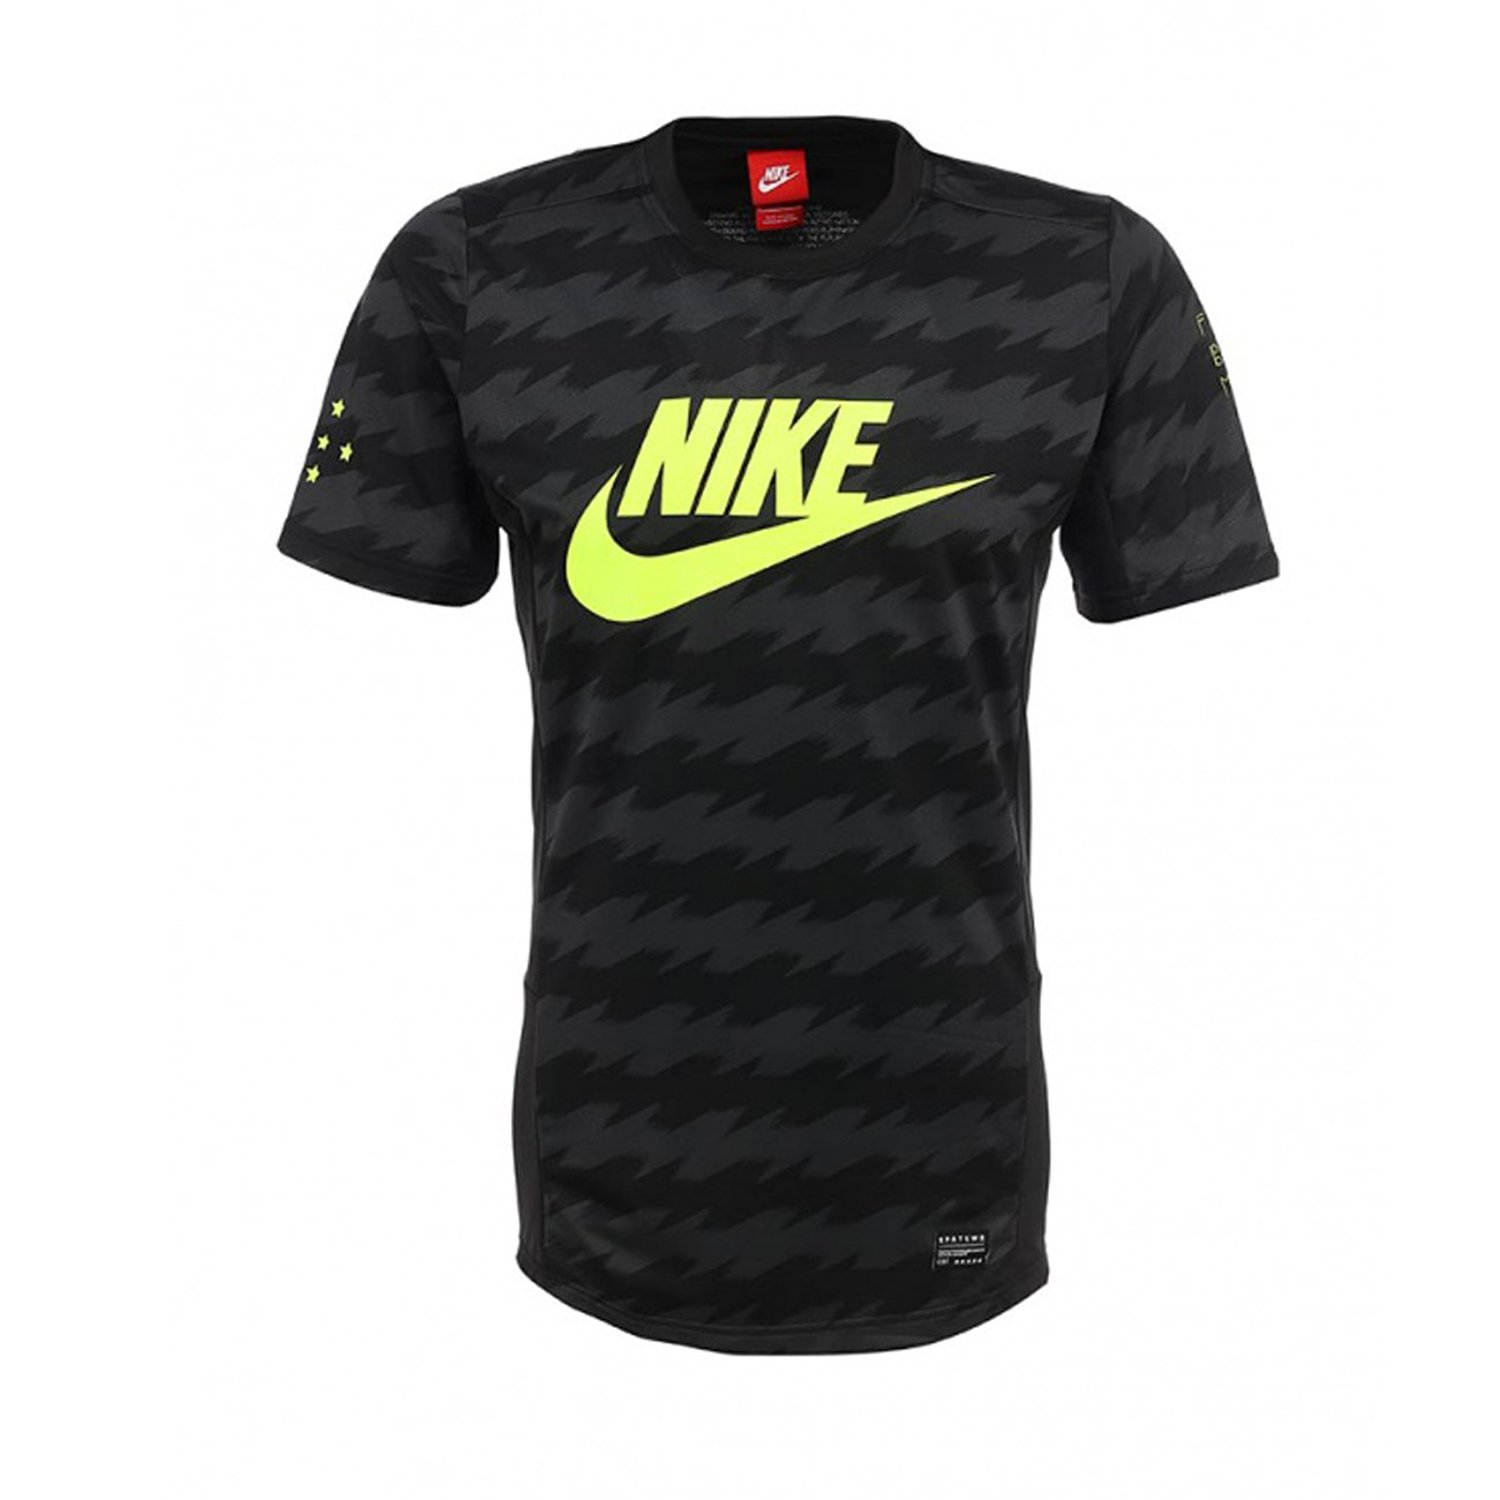

In [ ]:
from IPython.display import Image # Solid photo
Image("images/data_dir/Nike Merchandise/Image_5.jpg")

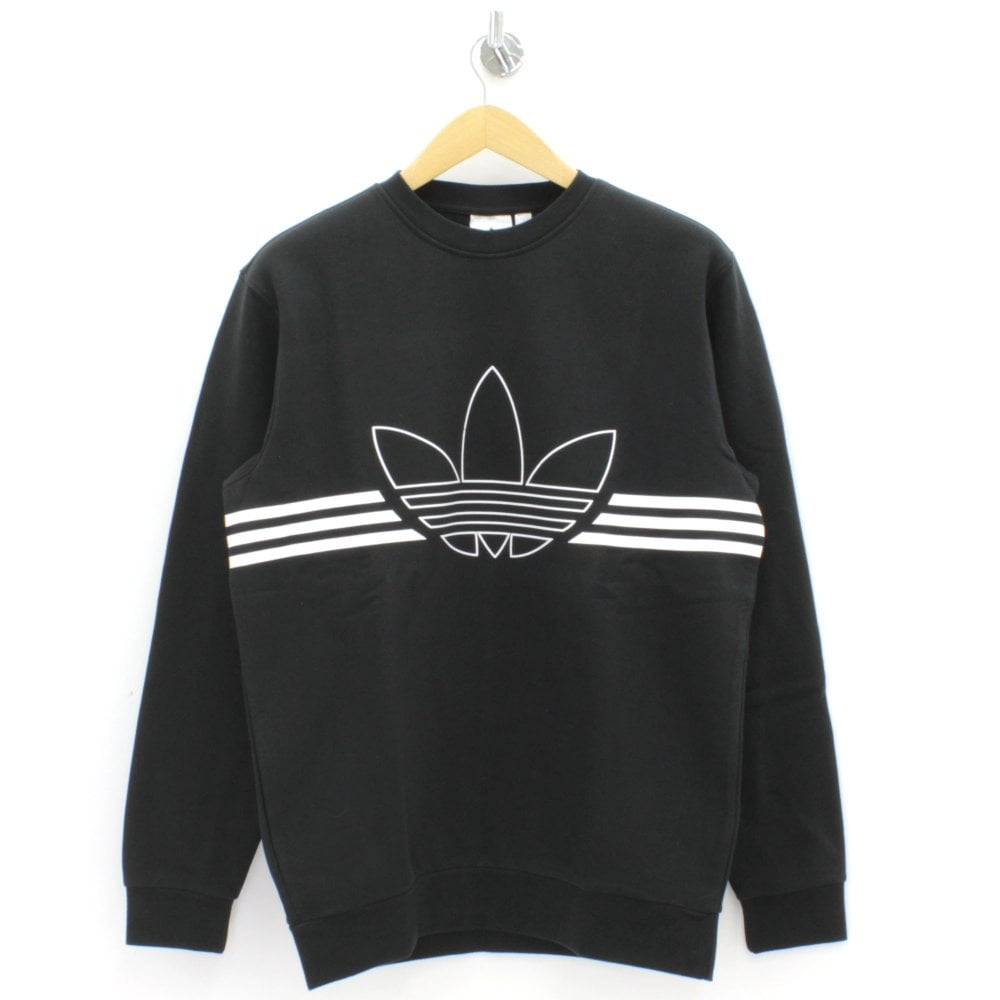

In [ ]:
Image("images/data_dir/Adidas Merchandise/Image_3.jpg") # Solid photo

## ❗ Concerning Issue

I can already tell I am going have a low accuracy. Adidas has two logos that I am seeing, an originals logo that we can see above and the iconic three stripes logo as seen below.

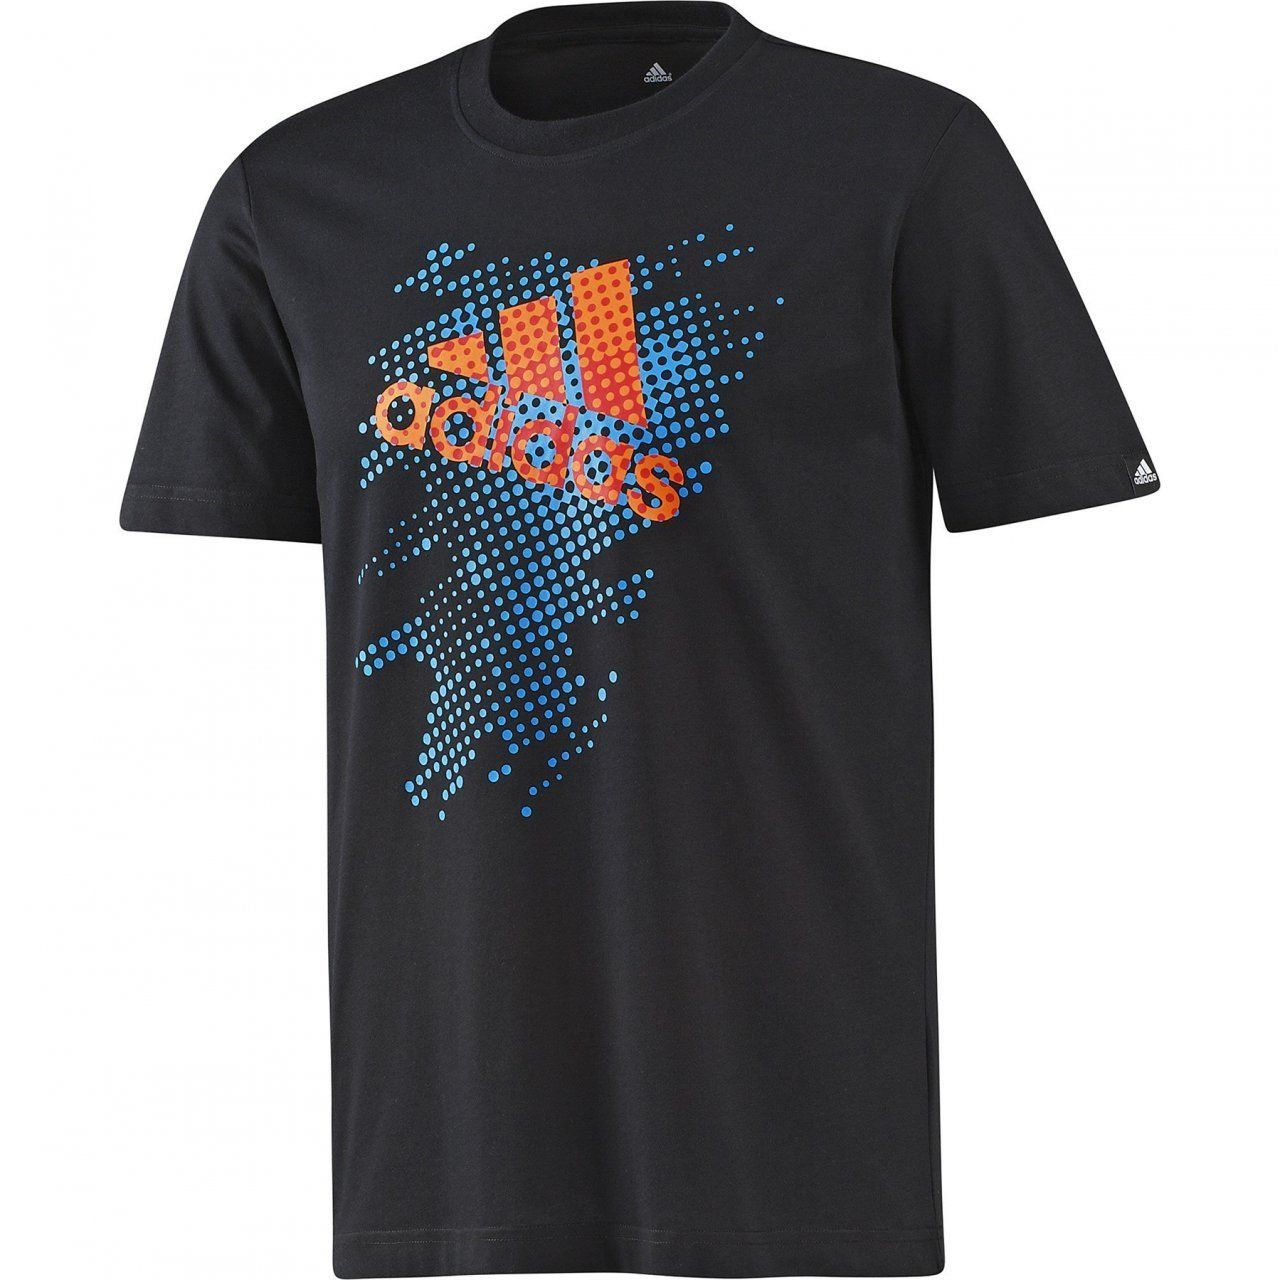

In [ ]:
Image("images/data_dir/Adidas Merchandise/Image_1.jpg") # See the logo difference

## Converting images to numpy

In [ ]:
from six import BytesIO
from PIL import Image
import glob
import os

In [ ]:
def load_image_into_numpy_array(path):
  img_data = open(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [ ]:
nike_image_path = "/content/images/Nike Merchandise/*"
nike_images_np = []
for iname in glob.glob(nike_image_path):
  try:
    nike_images_np.append(load_image_into_numpy_array(iname))
  except:
    print('An error occured for an image') # Several errors seen, so not full 300 images will be used in train and validation

An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image


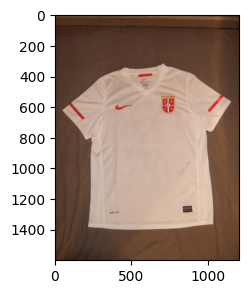

In [ ]:
plt.rcParams['figure.figsize'] = [14, 7]

for idx, nike_image_np in enumerate(nike_images_np):
  plt.subplot(2, 3, 6)
  plt.imshow(nike_image_np)
plt.show() # Solid image, but see how small the logo is

In [ ]:
adidas_image_path = "/content/images/Adidas Merchandise/*"
adidas_images_np = []
for iname in glob.glob(adidas_image_path):
  try:
    adidas_images_np.append(load_image_into_numpy_array(iname))
  except:
    print('An error occured for an image') # Several errors seen similar to Nike, train and validation will not have 300 images

An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image
An error occured for an image


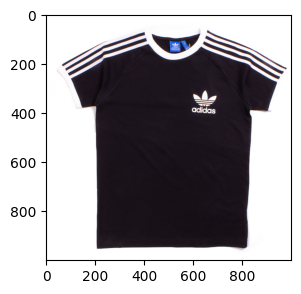

In [ ]:
plt.rcParams['figure.figsize'] = [14, 7]

for idx, adidas_image_np in enumerate(adidas_images_np):
  plt.subplot(2, 3, 6)
  plt.imshow(adidas_image_np)
plt.show() # Solid image, but see how small the logo is

# 🟠 Building Network

In [ ]:
# Building Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', # 32 kernels
                        input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

# 🟦 Compiling Model

In [ ]:
# Compiling Model
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

# 🔴 Train Test Split

Checking number of images for Adidas and Nike respectively

In [ ]:
data_dir = '/content/images/data_dir' # Useful for spliting train and test below

In [ ]:
adidas_dir = os.path.join(data_dir, 'Adidas Merchandise') # Making an Adidas directory to count number of images
nike_dir = os.path.join(data_dir, 'Nike Merchandise') # Same for Nike

adidas_images = len(os.listdir(adidas_dir)) # Length or number of images Adidas
nike_images = len(os.listdir(nike_dir)) # Length or number of images Nike

print(f'Number of Adidas images: {adidas_images}')
print(f'Number of Nike images: {nike_images}')

Number of Adidas images: 300
Number of Nike images: 300


## Train and Test Datagen Split

https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

Found this to split train and validation in ImageDataGenerator itself

In [ ]:
# Datagen Train and Validation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_generator = data_gen.flow_from_directory(data_dir,
                                          target_size = (224, 224),
                                          batch_size = 10,
                                          subset = 'training',
                                          class_mode = 'binary')
validation_generator = data_gen.flow_from_directory(data_dir,
                                        target_size = (224, 224),
                                        batch_size = 10,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 473 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


## Checking shape of batch and labels

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10,)


In [ ]:
labels_batch

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.], dtype=float32)

# 🟢 Fit CNN Model

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit(
      train_generator,
      steps_per_epoch=47, # ideally...len(trainX) // BS == 473/10 == 47.3 ~ 47 (my numbers)
      epochs=10,
      validation_data=validation_generator,
      validation_steps=11)  # ideally...len(valX) // BS == 117/10 == 11.7 ~ 11 (my numbers)


end = time.time()
print(end - start)

hello
Epoch 1/10
22/47 [=============>................] - ETA: 27s - loss: 0.7567 - acc: 0.5318

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


47/47 [==============================] - 59s 1s/step - loss: 0.7233 - acc: 0.5292 - val_loss: 0.6887 - val_acc: 0.5364
Epoch 2/10
47/47 [==============================] - 58s 1s/step - loss: 0.6825 - acc: 0.6026 - val_loss: 0.6882 - val_acc: 0.5182
Epoch 3/10
47/47 [==============================] - 57s 1s/step - loss: 0.6849 - acc: 0.5810 - val_loss: 0.6802 - val_acc: 0.5727
Epoch 4/10
47/47 [==============================] - 59s 1s/step - loss: 0.6283 - acc: 0.6739 - val_loss: 0.7884 - val_acc: 0.5636
Epoch 5/10
47/47 [==============================] - 58s 1s/step - loss: 0.5555 - acc: 0.6998 - val_loss: 0.7538 - val_acc: 0.5364
Epoch 6/10
47/47 [==============================] - 59s 1s/step - loss: 0.4785 - acc: 0.7581 - val_loss: 0.8464 - val_acc: 0.5727
Epoch 7/10
47/47 [==============================] - 60s 1s/step - loss: 0.3617 - acc: 0.8229 - val_loss: 1.0402 - val_acc: 0.5636
Epoch 8/10
47/47 [==============================] - 61s 1s/step - loss: 0.2858 - acc: 0.8661 - val_lo

## Model Save

In [ ]:
model.save('/content/images/adidas_nike_model', overwrite=True)

# 🟨 Accuracy and Loss Curves

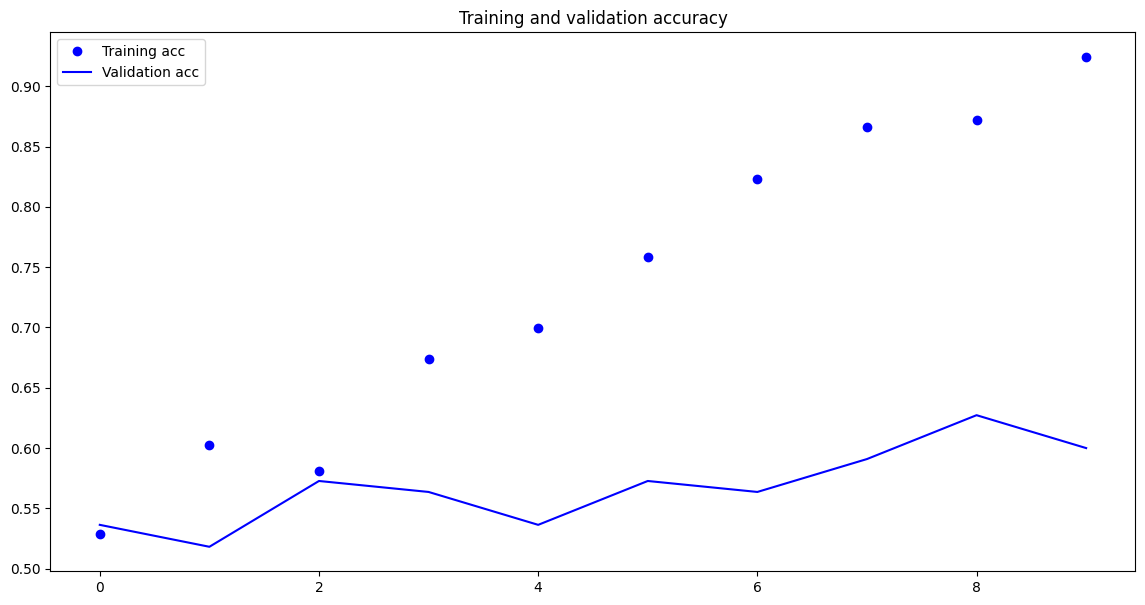

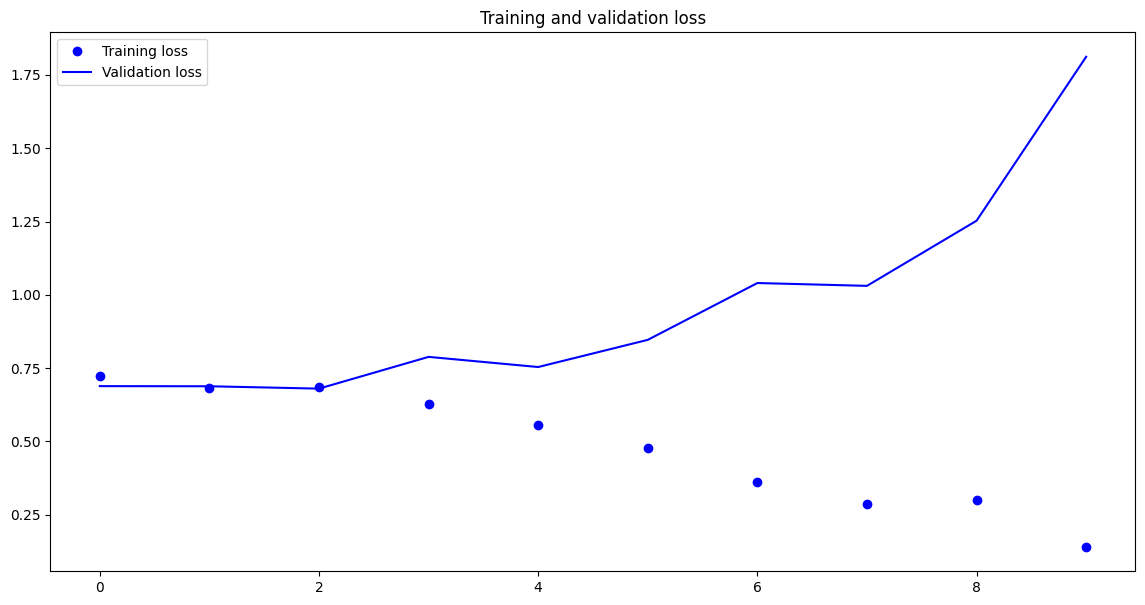

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Small Discussion

Overall the 10 epochs, the model memorized the train partition, as can be seen from the train accuracy from the first graph. The validation accuracy peaks at the 8th epoch and then trails down. With an early stopping callback, the model would probably prune back to the 8th epoch as being the best.

Looking at the validation loss, it only climbs and climbs. This is a big concern and I am not entirely sure why this is the case. However, we see training loss only decreases, as expected.

# 🟥 Model Accuracy Metrics

In [ ]:
tmp = model.predict(validation_generator)
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

12/12 [==============================] - 6s 456ms/step
(117, 1)
[[7.1364683e-01]
 [3.0531722e-01]
 [1.6333114e-01]
 [9.9999696e-01]
 [1.6087821e-06]]
(117, 1)
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [ ]:
validation_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
my_results = pd.DataFrame(columns=('actual','pred'))
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 117 // 11:  # hard-coded my numbers ! Validation Images/ Validation Step
    break

1/1 [==============================] - 0s 301ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 294ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 309ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 274ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 268ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 258ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 317ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 302ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 312ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 295ms/step


<ipython-input-126-b8ec6553952f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


In [ ]:
my_results

,actual,pred
0,1.0,0.000086
1,0.0,0.999970
2,1.0,0.996879
3,0.0,0.000021
4,0.0,0.017934
...,...,...
5,0.0,0.516698
6,0.0,0.401932
7,0.0,0.996106
8,0.0,0.977229


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62        51
         1.0       0.60      0.55      0.57        49

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[33 18]
 [22 27]]


Model Accuracy Metrics discussed below !

# 📗 Discussion/5 points

❗ 1) 4 Iterations ran and what I understood from them as detailed below:

* Iteration 1 (**200 images for each category, 10 epochs**):

39s 1s/step - loss: 0.2603 - acc: 0.8951 - val_loss: 1.1257 - val_acc: 0.6143


* Iteration 2 (**200 images for each category, 20 epochs with Augmentation**):

46s 1s/step - loss: 0.6932 - acc: 0.5049 - val_loss: 0.6926 - val_acc: 0.5286
Augmenting with following parameters:

                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.4,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest'


* Iteration 3 (**200 images for each category, 20 epochs**):

44s 1s/step - loss: 0.6929 - acc: 0.5016 - val_loss: 0.6924 - val_acc: 0.5571

* Iteration 4 (**300 images for each category, 10 epochs**):

 60s 1s/step - loss: 0.2997 - acc: 0.8723 - val_loss: 1.2526 - val_acc: 0.6273

Above are results for all 4 iterations with the best validation accuracy for a given epoch. As can be seen, the best model was from the last iteration with a validation accuracy of 0.6364. I am quite amazed that augmenting the data did not help, if anything it made my validation accuracy decrease, which is quite interesting. Maybe, it has to do with how I setup my train and validation, with the hyperparameters inside of the data generator itself.

❗ 2) As mentioned at the top, I sort of expected this outcome. Firstly, a logo is such a small part of any merchandise. These days with the minimalistic fashion movement, they try to even hide the logo, so of course the model struggles, as even humans have a hard time deciphering what brand it is. Also coming to how adidas has two unique logos, it is also another huge challenge for the model. Maybe a classification of Adidas Originals vs. the standard Adidas logo might be a good classification problem to check as well.

❗ 3) Looking at the accuracy and loss curves, over the 10 epochs, the model memorized the train partition, as can be seen from the train accuracy from the first graph. The validation accuracy peaks at the 8th epoch and then trails down. With an early stopping callback, the model would probably prune back to the 8th epoch as being the best.

Looking at the validation loss, it only climbs and climbs. This is a big concern and I am not entirely sure why this is the case. However, we see training loss only decreases, as expected.

Next, Looking at the classification report and confusion matrix above for the validation partition, we can see that this is not a great model. 60 predictions lie on the diagonal which is the only good sign. But 40 are predicted incorrectly. My model has a weighted F-1 of 0.6, which shows it doesn't do too well on recall or precision either. Overall, this model can be improved further with more data, better pre-processing of the images, and hyperparameter tuning!

❗ 4) One thing I did to try to improve this model and capture the logos better was have an input image size of 224 x 224, which is something I saw online as a standard for images generally. I did this on purpose to try and let the model potentially catch the logos. However, to no avail, and in a future iteration I would pick even bigger image input sizes. Further, I think giving it more than 300 images per category would also help. Lastly, I also think adjusting the kernels would be something I would try next time as well. Maybe 32 initial kernels are too few, and next time starting with a larger number of kernels may help it capture more granular details.

❗ 5) Overall, I am quite happy with my learnings and how this assignment turned out. It would probably drive me crazy to sit here and run this model for 5-6 hours, but in a future iteration or with better pre-processing of the images, it could potentailly yield better results. Still I am quite amazed that we can even convert images into simple numbers and have a model predict it! Super cool assignment!